# Heart disease prediction project
The dataset used in this project was uploaded to the UCI Machine Learning Repository by Andras Janosi, William Steinbrunn, Matthias Pfisterer and Robert Detrano. It is a collection of medical data aimed at predicting the risk of heart disease. Below is the description of the dataset columns:

age: Age of the patient in years.<br>
sex: Sex of the patient (1 = male, 0 = female).<br>
cp: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).<br>
trestbps: Resting blood pressure (in mm Hg on admission to the hospital).<br>
chol: Serum cholesterol in mg/dL.<br>
fbs: Fasting blood sugar > 120 mg/dL (1 = true, 0 = false).<br>
restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).<br>
thalach: Maximum heart rate achieved.<br>
exang: Exercise-induced angina (1 = yes, 0 = no).<br>
oldpeak: ST depression induced by exercise relative to rest.<br>
slope: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).<br>
ca: Number of major vessels (0-3) colored by fluoroscopy.<br>
thal: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect).<br>
target: Target variable (1 = presence of heart disease, 0 = absence of heart disease).<br>

We can identify 9 categorical variables (sex, cp, fbs, restecg, exang, slope, ca, thal, target) and 5 numerical variables (age, trestbps, chol, thalach, oldpeak). The dependent variable in this dataset is 'target,' which indicates the presence or absence of heart disease.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# First, we need to verify that the data types have been correctly assigned.
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Since the data has been correctly imported into the project, no corrections are needed in this regard.

### Exploratory data analysis

In [23]:
# Next, we want to examine some descriptive statistics of the data.
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We can see that there are no empty values in any of the columns, so there's no need to drop or replace any data. Additionally, the minimum and maximum values for the categorical variables are as expected, except for the number of vessels colored by fluoroscopy. This variable should have values ranging from 0 to 3, but we observe a range from 0 to 4 instead. We can examine the number of values outside the expected range as follows:

In [24]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

We can observe that there are 5 occurrences where the value of 'ca' is 4. Since we don't have additional information from this dataset, we will keep these values, assuming that the range of the variable extends from 0 to 4.

From the mean of 'sex,' we can infer that the number of male patients is considerably higher. We can check the exact distribution as follows:

In [25]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

The number of male patients is more than double that of female patients, making it difficult to directly infer the influence of sex on the dependent variable.<br>
To see the age distribution of the male and female patients we can plot the histogram as follows:

Text(0, 0.5, 'Frequency')

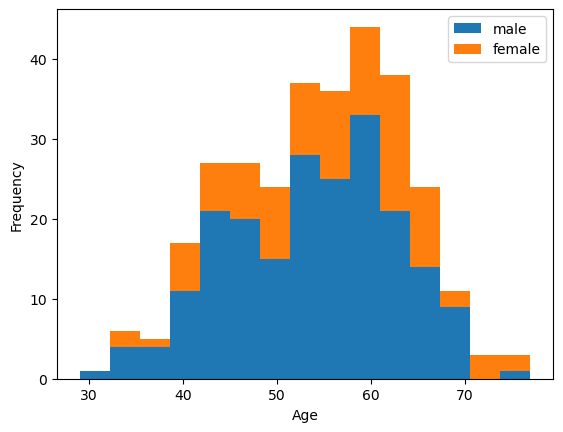

In [26]:
fig, ax = plt.subplots(1, 1) 
plt.hist([df.loc[df['sex'] == 1]['age'], df.loc[df['sex'] == 0]['age']], 15, stacked = True)
labels = ['male', 'female']
plt.legend(labels)
ax.set_xlabel('Age') 
ax.set_ylabel('Frequency') 


As observed in the descriptive metrics, the age of the patients ranges from 29 to 77 years, with a central tendency around 55 years. The age distribution shows a slight negative skew, indicating a higher frequency of older patients. This could suggest that older individuals may have a greater concern about their health.

In [27]:
print('skew is '+ str(df['age'].skew()))

skew is -0.2024633654856539


We can explore the correlation between the different numerical variables with a correlation heatmap. 

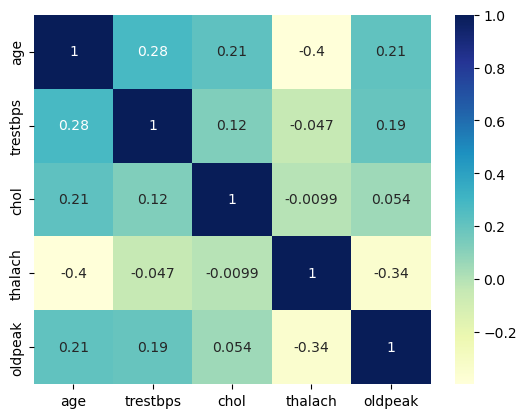

In [28]:
dfnum=df[['age','trestbps','chol','thalach','oldpeak']]
dataplot = sns.heatmap(dfnum.corr(), cmap="YlGnBu", annot=True)

Among the numerical variables, we can see that the strongest correlation is a negative correlation between age and thalach or the maximum heart rate during the tests. 

In [29]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['age'],df['thalach'])
print('p-value =',p_value)

p-value = 5.628106676351307e-13


The p-value is much lower than the usual threshold (0.05) to consider the correlation significant. So we can conclude that there is a strong certainty in the result. 

<AxesSubplot: xlabel='age', ylabel='thalach'>

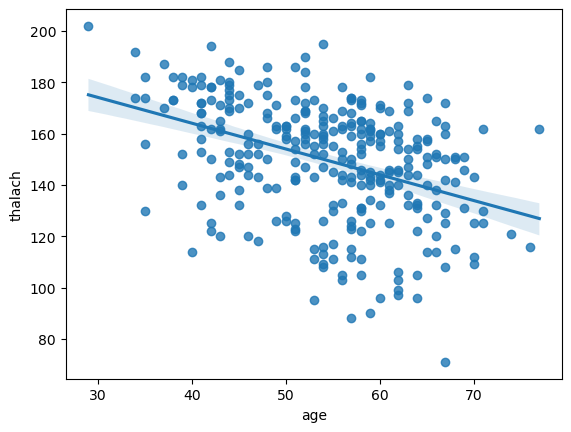

In [30]:
sns.regplot(x='age',y='thalach', data=df)

Next, we aim to gain insights into the relationship between chest pain type and the presence of heart disease. To achieve this, we will plot the proportion of the target variable for each chest pain type.

<AxesSubplot: xlabel='cp'>

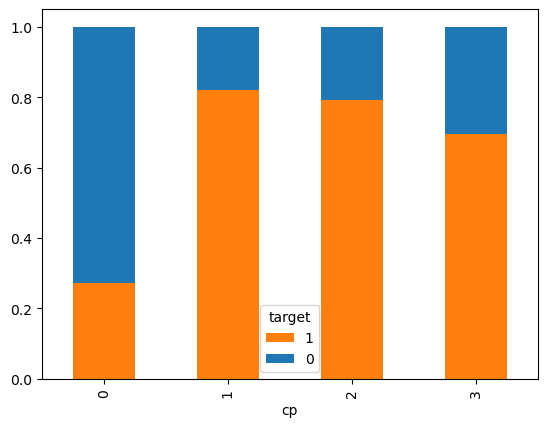

In [31]:
dfcount=df.groupby('cp')['target'].value_counts(normalize=True).unstack('target')
dfcount.sort_index(axis=1,ascending=False).plot.bar(stacked=True,color=['tab:orange','tab:blue'])


We observe that the number of patients with heart disease is significantly higher for those experiencing chest pain categorized as 'atypical angina,' 'non-anginal pain,' and 'asymptomatic,' compared to those with 'typical angina.' This suggests that 'typical angina' may be associated with a broader range of conditions, including non-heart-related diseases, than the other types of chest pain.

### Machine learning models 

Now to start with the process of modeling the data we are going to asign the independent and dependent variables into arrays X and y respectively.

In [32]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

We split the dataset into training and testing datasets. In this case we used 80% of the dataset for the training of the machine learning models.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y, random_state=1)

We scale the numerical variables, so that they don't have higher influence than the categorical variables due to the magnitude of the numbers

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[0,3,4,7,9]] = sc.fit_transform(X_train[:,[0,3,4,7,9]])
X_test[:,[0,3,4,7,9]] = sc.transform(X_test[:,[0,3,4,7,9]])



### Logistic Regression model
We have to import the logistic regression class, then create the logistic regression object and fit it to the train data

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

Then we use the fitted logistic regression model to predict the test set results and compare them with the y_test set of real observations. To see the performance of the model we look at the confusion matrix and some descriptive metrics.

In [36]:
y_pred=classifier.predict(X_test)


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[21  7]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



We see that the accuracy of the fitted model is around 80% with a recall of 85% ,which will be the metric we are trying to maximize, as it's critical to accurately predict the possitive cases, as false negatives are the most dangerous situations.

### Random Forest model


In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion= 'entropy', random_state=1)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[23  5]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In this case, the Random Forest Classifier demonstrates higher accuracy than the Logistic Regression model. However, the recall is approximately 3% lower, suggesting that, with these random states, Logistic Regression might be the better choice for this scenario. Additionally, the F1 score— a weighted average of precision and recall—shows little difference between the models. This indicates that the higher accuracy of the Random Forest model does not significantly enhance overall performance.